# Cleaning and EDA 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import re

pd.options.display.max_columns = None
pd.options.display.max_rows = None 

## Dale

In [2]:
pitbull = pd.read_csv('../Data/pitbull.csv')

In [3]:
pitbull.head()

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics
0,Pitbull (Ft. Vein (Producer)),11:59 by Pitbull (Ft. Vein (Producer)),654086,11:59,11:59 (Ft. Vein (Producer)),https://genius.com/Pitbull-11-59-lyrics,"[{'api_path': '/artists/7076', 'header_image_u...",Pitbull,11 Contributors11:59 Lyrics[Intro: Pitbull & V...
1,Pitbull (Ft. Lil Jon),305 Anthem by Pitbull (Ft. Lil Jon),37215,305 Anthem,305 Anthem (Ft. Lil Jon),https://genius.com/Pitbull-305-anthem-lyrics,"[{'api_path': '/artists/107', 'header_image_ur...",Pitbull,17 Contributors305 Anthem Lyrics[Intro: Pitbul...
2,Pitbull (Ft. Jamie Drastik),305 In Paris by Pitbull (Ft. Jamie Drastik),9071119,305 In Paris,305 In Paris (Ft. Jamie Drastik),https://genius.com/Pitbull-305-in-paris-lyrics,"[{'api_path': '/artists/26923', 'header_image_...",Pitbull,1 Contributor305 In Paris Lyrics[Intro]\nWe're...
3,Pitbull,305 Til I Die by Pitbull,8988638,305 Til I Die,305 Til I Die,https://genius.com/Pitbull-305-til-i-die-lyrics,[],Pitbull,1 Contributor305 Til I Die Lyrics[Intro]\nIntr...
4,Los Rafas (Ft. Pitbull),3bkzo RIMIX by Los Rafas (Ft. Pitbull),3972879,3bkzo RIMIX,3bkzo RIMIX (Ft. Pitbull),https://genius.com/Los-rafas-3bkzo-rimix-lyrics,"[{'api_path': '/artists/628', 'header_image_ur...",Los Rafas,1 Contributor3bkzo RIMIX Lyrics[INTRO]\nMateín...


Found the Crfawkz song, and I don't think Pitbull is from Canada:

![Crz](../Images/crz.png)

In [4]:
pitbull.shape

(672, 9)

In [5]:
row = pitbull[pitbull['full_title'].str.contains('Crzfawkz')]
row

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics
133,CRZFawkz (Ft. Zed elh),Crzfawkz holla at me verse ( TEST ONLY ) by CR...,4904560,Crzfawkz holla at me verse ( TEST ONLY ),Crzfawkz holla at me verse ( TEST ONLY ) (Ft. ...,https://genius.com/Crzfawkz-crzfawkz-holla-at-...,"[{'api_path': '/artists/1915183', 'header_imag...",CRZFawkz,1 ContributorCrzfawkz holla at me verse ( TEST...


In [6]:
pitbull = pitbull.drop(133)

In [7]:
pitbull.shape 

(671, 9)

#### Removing certain phrases mixed in the lyrics from the website structure and trying to isolate Pitbull's lyrics:  

In [8]:
def only_pit(lyrics_series):
    cleaned_lines = []
    for lyrics in lyrics_series:
        lines = lyrics.split('\n')
        i = 0
        while i < len(lines):
            line = lines[i]
            if re.search(r'^\[(Verse \d{1,2}|Chorus): Pitbull\]', line):
                cleaned_lines.append(line)
                i += 1
                while i < len(lines) and not re.search(r'^\[.*\]$', lines[i]):
                    cleaned_lines.append(lines[i])
                    i += 1
            else:
                i += 1
    cleaned_lyrics = '\n'.join(cleaned_lines)
    return cleaned_lyrics

def exclude_phrases(lyrics):
    excluded_phrases = [
        r'\[Chorus: (?!Pitbull).*?\]',
        r'\[Pre-Chorus: (?!Pitbull).*?\]',
        r'\[Verse \d+.*?\]',
        r'\{Verse \d+.*?\}',
        r'\(x\d+\)',
        r'Embed',
        r'See Pitbull LiveGet tickets as low as $48You might also like',
        r'See Pitbull LiveGet tickets as low as $48 You might also like',
        r'\[Hook: .*?\]',
        r'Repeat Break',
        r'Repeat Chorus',
    ]
    cleaned_lyrics = re.sub('|'.join(excluded_phrases), '', lyrics)
    return cleaned_lyrics

# Extract lyrics by Pitbull only
pitbull_lyrics = only_pit(pitbull['lyrics'])

# Exclude unwanted phrases
cleaned_lyrics = exclude_phrases(pitbull_lyrics)

print(cleaned_lyrics)


We shut down Times Square, extra extra read all about it
New year, it's our year, to be clear, we here
Immigrant parents but
I'm living the American dream for them now
It's it's it's about to go down
This is for Eddie, Bobby, Rudy, Johnny
Up in the sky drinking voli lodi dodi
I don't need a Maybach or Buggati
Couple of beds with some sheets, that's a party
Go DJ, head blow the speakers
All my women wear heels, no sneakers
Grim reaper, the night is mine
Meet me at 11:59


Man I've been on the grind
1 in the head, 16 in the nine, I'm extra man
The game is mine in due time
It's alright I'm patient man
I know how to play my position, I know how to play my part
I know how to play these bitches, I know how to play with they hearts
I've done some dumb things, but for the most I've played it smart
Who cares if you run things? Cause I'm as live as 106 & Park
This game is nothing but a pool of blood with a bunch of sharks
Only the strong survive; It's do or die get it right
That why I roll for 

#### Creating another column for the cleaned lyrics:

In [9]:
pitbull['cleaned_lyrics'] = pitbull['lyrics'].apply(lambda x: exclude_phrases(only_pit([x])))

pitbull.head()

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics,cleaned_lyrics
0,Pitbull (Ft. Vein (Producer)),11:59 by Pitbull (Ft. Vein (Producer)),654086,11:59,11:59 (Ft. Vein (Producer)),https://genius.com/Pitbull-11-59-lyrics,"[{'api_path': '/artists/7076', 'header_image_u...",Pitbull,11 Contributors11:59 Lyrics[Intro: Pitbull & V...,"\nWe shut down Times Square, extra extra read ..."
1,Pitbull (Ft. Lil Jon),305 Anthem by Pitbull (Ft. Lil Jon),37215,305 Anthem,305 Anthem (Ft. Lil Jon),https://genius.com/Pitbull-305-anthem-lyrics,"[{'api_path': '/artists/107', 'header_image_ur...",Pitbull,17 Contributors305 Anthem Lyrics[Intro: Pitbul...,"\nMan I've been on the grind\n1 in the head, 1..."
2,Pitbull (Ft. Jamie Drastik),305 In Paris by Pitbull (Ft. Jamie Drastik),9071119,305 In Paris,305 In Paris (Ft. Jamie Drastik),https://genius.com/Pitbull-305-in-paris-lyrics,"[{'api_path': '/artists/26923', 'header_image_...",Pitbull,1 Contributor305 In Paris Lyrics[Intro]\nWe're...,[Chorus: Pitbull]\nFlow so hard that chico get...
3,Pitbull,305 Til I Die by Pitbull,8988638,305 Til I Die,305 Til I Die,https://genius.com/Pitbull-305-til-i-die-lyrics,[],Pitbull,1 Contributor305 Til I Die Lyrics[Intro]\nIntr...,
4,Los Rafas (Ft. Pitbull),3bkzo RIMIX by Los Rafas (Ft. Pitbull),3972879,3bkzo RIMIX,3bkzo RIMIX (Ft. Pitbull),https://genius.com/Los-rafas-3bkzo-rimix-lyrics,"[{'api_path': '/artists/628', 'header_image_ur...",Los Rafas,1 Contributor3bkzo RIMIX Lyrics[INTRO]\nMateín...,


#### Removing specific words 

I don't want certain words included because: 
1. They are not in Pitbull's lyrics (in case other artist's lyrics are still included)
2. They are a part of the website's formatting 
3. I would be mortified if the lyrics generator produced these words (I excluded the Black Eyed Peas due to one of these words being included in a top song - trying to reduce and/or eliminate the possibility of the model/generator using slurs or being too vulgar)

*Apologies* 

In [10]:
def remove_words(lyrics, substrings):
    lyrics_lower = lyrics.lower()  # Convert lyrics to lowercase
    cleaned_lyrics = ' '.join([word for word in lyrics_lower.split() if not any(substring in word for substring in substrings)])
    return cleaned_lyrics

# Words to remove
substrings = ['contributor', 'intro', 'verse', 'chorus', 'liveget', 'tickets', 'bridge', 'hook', 'nigg', 'retar', 'pussy', 'dick']

# Apply the remove_words function to the lyrics
pitbull['clean_cleaned_lyrics'] = pitbull['lyrics'].apply(lambda x: remove_words(x, substrings))

pitbull.head()

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics,cleaned_lyrics,clean_cleaned_lyrics
0,Pitbull (Ft. Vein (Producer)),11:59 by Pitbull (Ft. Vein (Producer)),654086,11:59,11:59 (Ft. Vein (Producer)),https://genius.com/Pitbull-11-59-lyrics,"[{'api_path': '/artists/7076', 'header_image_u...",Pitbull,11 Contributors11:59 Lyrics[Intro: Pitbull & V...,"\nWe shut down Times Square, extra extra read ...",11 pitbull & vein] vein! someone point me to t...
1,Pitbull (Ft. Lil Jon),305 Anthem by Pitbull (Ft. Lil Jon),37215,305 Anthem,305 Anthem (Ft. Lil Jon),https://genius.com/Pitbull-305-anthem-lyrics,"[{'api_path': '/artists/107', 'header_image_ur...",Pitbull,17 Contributors305 Anthem Lyrics[Intro: Pitbul...,"\nMan I've been on the grind\n1 in the head, 1...","17 anthem pitbull] this that lil chico, pitbul..."
2,Pitbull (Ft. Jamie Drastik),305 In Paris by Pitbull (Ft. Jamie Drastik),9071119,305 In Paris,305 In Paris (Ft. Jamie Drastik),https://genius.com/Pitbull-305-in-paris-lyrics,"[{'api_path': '/artists/26923', 'header_image_...",Pitbull,1 Contributor305 In Paris Lyrics[Intro]\nWe're...,[Chorus: Pitbull]\nFlow so hard that chico get...,"1 in paris we're gonna skate to one song, one ..."
3,Pitbull,305 Til I Die by Pitbull,8988638,305 Til I Die,305 Til I Die,https://genius.com/Pitbull-305-til-i-die-lyrics,[],Pitbull,1 Contributor305 Til I Die Lyrics[Intro]\nIntr...,,"1 til i die mr three, yeah o, yeah five hop in..."
4,Los Rafas (Ft. Pitbull),3bkzo RIMIX by Los Rafas (Ft. Pitbull),3972879,3bkzo RIMIX,3bkzo RIMIX (Ft. Pitbull),https://genius.com/Los-rafas-3bkzo-rimix-lyrics,"[{'api_path': '/artists/628', 'header_image_ur...",Los Rafas,1 Contributor3bkzo RIMIX Lyrics[INTRO]\nMateín...,,1 rimix mateín y checho representando a los ra...


In [11]:
lyrics_index = pitbull.loc[1, 'clean_cleaned_lyrics']
print(lyrics_index)

17 anthem pitbull] this that lil chico, pitbull (yeah, yeah) this my way of letting my city know that i'd ride for 'em (yeah, yeah, yeah) i'd cry for 'em, bust 5 for 'em, and most of all fuckin die for em... lil jon & pitbull] hey, 305...till i die hey, 305...till i die hey, 305...till i die hey, 305...till i die lil jon & pitbull] i ride for my motherfuckin clique (for my clique, bruh) bitch, i die for my motherfuckin clique (for my clique, bruh) i bust heads with my motherfuckin clique (for my clique, bruh) a talk shit, watch my shit go click (click, click, click, click, click, click) i ride for my motherfuckin clique (for my clique, bruh) bitch, i die for my motherfuckin clique (for my clique, bruh) i bust heads with my motherfuckin clique (for my clique, bruh) a talk shit, watch my shit go click (click, click, click, click, click, click, click) 1: pitbull] man i've been on the grind 1 in the head, 16 in the nine, i'm extra man the game is mine in due time it's alright i'm patient m

In [12]:
# Save the DataFrame to a CSV file
pitbull.to_csv('../Data/pitbull_clean.csv', index=False)

## Not Dale

In [13]:
other = pd.read_csv('../Data/other_artists.csv')

In [14]:
other.head(3)

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics
0,Britney Spears,...Baby One More Time by Britney Spears,78169,...Baby One More Time,...Baby One More Time,https://genius.com/Britney-spears-baby-one-mor...,[],Britney Spears,118 ContributorsTranslationsItalianoEnglish......
1,Britney Spears,Toxic by Britney Spears,110982,Toxic,Toxic,https://genius.com/Britney-spears-toxic-lyrics,[],Britney Spears,109 ContributorsTranslationsСрпскиPortuguêsTox...
2,Britney Spears,Work Bitch by Britney Spears,218073,Work Bitch,Work Bitch,https://genius.com/Britney-spears-work-bitch-l...,[],Britney Spears,70 ContributorsTranslationsPortuguêsWork Bitch...


In [15]:
# Search for 'Pitbull' in any column of the 'other' DataFrame
pitbull_other = other[other.apply(lambda x: x.astype(str).str.contains('Pitbull', case=False).any(), axis=1)]

# Display the rows containing 'Pitbull'
print(pitbull_other)

                                       artist_names  \
112  Daddy Yankee (Ft. Lil Jon, N.O.R.E. & Pitbull)   
186                           Shakira (Ft. Pitbull)   
378                          Flo Rida (Ft. Pitbull)   

                                            full_title      id  \
112  Gasolina (Remix) by Daddy Yankee (Ft. Lil Jon,...    4171   
186  Rabiosa (English Version) by Shakira (Ft. Pitb...   50833   
378         Can't Believe It by Flo Rida (Ft. Pitbull)  197907   

                         title  \
112           Gasolina (Remix)   
186  Rabiosa (English Version)   
378           Can’t Believe It   

                                   title_with_featured  \
112  Gasolina (Remix) (Ft. Lil Jon, N.O.R.E. & Pitb...   
186            Rabiosa (English Version) (Ft. Pitbull)   
378                     Can't Believe It (Ft. Pitbull)   

                                                   url  \
112  https://genius.com/Daddy-yankee-gasolina-remix...   
186  https://genius.com/Shak

In [16]:
other.shape 

(590, 9)

In [17]:
# Delete the rows containing 'Pitbull'
other = other.drop(pitbull_other.index)

other.shape

(587, 9)

In [18]:
lyrics_gucci = other.loc[207, 'lyrics']
print(lyrics_gucci)

170 ContributorsI Get the Bag Lyrics[Intro: Gucci Mane & Quavo]
Ha
It's Gucci, it's Drop Top
Wizop, whoo
Yeah, ayy (Go)

[Chorus: Quavo]
You get the bag and fumble it
I get the bag and flip it and tumble it (Yeah)
Straight out the lot, three hundred cash (Cash)
And the car came with a blunt in it (Yeah)
Lil' mama a thot, and she got ass (Thot)
And she gon' fuck up a bag (Yeah)
Pull up to the spot, livin' too fast (Yeah)
Droppin' the dope in the stash (Yeah)
In Italy, got two foreign hoes, they DM me (Ooh, brr, ayy)
Drop the top when it's cold (Drop-top)
But you feel the heat (Skrrt, yeah, ayy)
Be real with me
Keep it 100, just be real with me (Ayy)
Eat it up like it's a feast (Woah, eat it up)
They say the dope on fleek (Yep)

[Verse 1: Takeoff]
Percocet pill on me (Percocet)
Ice on my neck, baby, chill with me (Ice)
Them niggas that post in the back don't say nothin'
Them niggas will kill for me
Back ends I count in my sleep, on fleek
Hundred K spent on a Patek Phillippe (Phillippe)
B

I am removing these words from the dataframe for other artists as well to prevent the generator/model from possibly reproducing these words. 

In [19]:
# Apply the remove_words function to the lyrics
other['clean_cleaned_lyrics'] = other['lyrics'].apply(lambda x: remove_words(x, substrings))

other.head()

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics,clean_cleaned_lyrics
0,Britney Spears,...Baby One More Time by Britney Spears,78169,...Baby One More Time,...Baby One More Time,https://genius.com/Britney-spears-baby-one-mor...,[],Britney Spears,118 ContributorsTranslationsItalianoEnglish......,"118 one more time oh, baby, baby oh, baby, bab..."
1,Britney Spears,Toxic by Britney Spears,110982,Toxic,Toxic,https://genius.com/Britney-spears-toxic-lyrics,[],Britney Spears,109 ContributorsTranslationsСрпскиPortuguêsTox...,"109 1] baby, can't you see i'm calling? a guy ..."
2,Britney Spears,Work Bitch by Britney Spears,218073,Work Bitch,Work Bitch,https://genius.com/Britney-spears-work-bitch-l...,[],Britney Spears,70 ContributorsTranslationsPortuguêsWork Bitch...,70 bitch you wanna? you wanna? you want a hot ...
3,Britney Spears,Oops!... I Did It Again by Britney Spears,3988,Oops!... I Did It Again,Oops!... I Did It Again,https://genius.com/Britney-spears-oops-i-did-i...,[],Britney Spears,73 ContributorsOops!... I Did It Again Lyrics[...,"73 i did it again mmm, yeah yeah, yeah, yeah, ..."
4,Britney Spears,If U Seek Amy by Britney Spears,193709,If U Seek Amy,If U Seek Amy,https://genius.com/Britney-spears-if-u-seek-am...,[],Britney Spears,66 ContributorsTranslationsEnglishIf U Seek Am...,"66 u seek amy la, la, la, la, la-la, la, la la..."


In [20]:
lyrics_gucci = other.loc[207, 'clean_cleaned_lyrics']
print(lyrics_gucci)

170 get the bag gucci mane & quavo] ha it's gucci, it's drop top wizop, whoo yeah, ayy (go) quavo] you get the bag and fumble it i get the bag and flip it and tumble it (yeah) straight out the lot, three hundred cash (cash) and the car came with a blunt in it (yeah) lil' mama a thot, and she got ass (thot) and she gon' fuck up a bag (yeah) pull up to the spot, livin' too fast (yeah) droppin' the dope in the stash (yeah) in italy, got two foreign hoes, they dm me (ooh, brr, ayy) drop the top when it's cold (drop-top) but you feel the heat (skrrt, yeah, ayy) be real with me keep it 100, just be real with me (ayy) eat it up like it's a feast (woah, eat it up) they say the dope on fleek (yep) 1: takeoff] percocet pill on me (percocet) ice on my neck, baby, chill with me (ice) them that post in the back don't say nothin' them will kill for me back ends i count in my sleep, on fleek hundred k spent on a patek phillippe (phillippe) bitch, i'm a dog, eat my treat (hrr) hop out the frog and lea

In [21]:
# Save the DataFrame to a CSV file
other.to_csv('../Data/other_clean.csv', index=False)

## Tokenizers, Lemmatizers, and Vectorizers

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()

In [23]:
# Define preprocessing functions

# Remove all non-word characters (everything except numbers and letters)
def remove_special_chars(text):
    text = re.sub(r"[^\w\s]", "", text)
    return text

# Use RegEx to tokenize the text
def tokenize(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return tokens

# Lemmatize the tokens
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lem_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lem_tokens

# Remove stop words from the tokens
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english', 'spanish'))
    filtered_tokens = [token for token in tokens if not token.lower() in stop_words]
    return filtered_tokens

# Remove numbers 
#https://stackoverflow.com/questions/73565193/re-sub-i-would-like-replace-list-of-words-following-number-with-some-string 
#https://stackoverflow.com/questions/68064934/changing-a-word-surrounded-by-numbers-using-re-sub 
def remove_numbers(words_list):
    # Iterate over each word in the list
    cleaned_words = []
    for word in words_list:
        # Check if the word is '305' - keeping this number only as it is a sacred Pitbull text 
        if word == '305':
            cleaned_words.append(word)
        else:
            # Remove any digits from the word
            cleaned_word = re.sub(r'\d+', '', word)
            cleaned_words.append(cleaned_word)
    return cleaned_words

# Apply preprocessing functions 
def apply_token(df):
    df['clean_cleaned_lyrics'] = df['clean_cleaned_lyrics'].apply(remove_special_chars)
    df['clean_cleaned_lyrics'] = df['clean_cleaned_lyrics'].apply(tokenize)
    df['clean_cleaned_lyrics'] = df['clean_cleaned_lyrics'].apply(lemmatize)
    df['clean_cleaned_lyrics'] = df['clean_cleaned_lyrics'].apply(remove_stopwords)
    df['clean_cleaned_lyrics'] = df['clean_cleaned_lyrics'].apply(remove_numbers)

    return df

#### Read in the data:

In [24]:
pitbull = pd.read_csv('../Data/pitbull_clean.csv') 

In [25]:
pitbull.head(3)

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics,cleaned_lyrics,clean_cleaned_lyrics
0,Pitbull (Ft. Vein (Producer)),11:59 by Pitbull (Ft. Vein (Producer)),654086,11:59,11:59 (Ft. Vein (Producer)),https://genius.com/Pitbull-11-59-lyrics,"[{'api_path': '/artists/7076', 'header_image_u...",Pitbull,11 Contributors11:59 Lyrics[Intro: Pitbull & V...,"\nWe shut down Times Square, extra extra read ...",11 pitbull & vein] vein! someone point me to t...
1,Pitbull (Ft. Lil Jon),305 Anthem by Pitbull (Ft. Lil Jon),37215,305 Anthem,305 Anthem (Ft. Lil Jon),https://genius.com/Pitbull-305-anthem-lyrics,"[{'api_path': '/artists/107', 'header_image_ur...",Pitbull,17 Contributors305 Anthem Lyrics[Intro: Pitbul...,"\nMan I've been on the grind\n1 in the head, 1...","17 anthem pitbull] this that lil chico, pitbul..."
2,Pitbull (Ft. Jamie Drastik),305 In Paris by Pitbull (Ft. Jamie Drastik),9071119,305 In Paris,305 In Paris (Ft. Jamie Drastik),https://genius.com/Pitbull-305-in-paris-lyrics,"[{'api_path': '/artists/26923', 'header_image_...",Pitbull,1 Contributor305 In Paris Lyrics[Intro]\nWe're...,[Chorus: Pitbull]\nFlow so hard that chico get...,"1 in paris we're gonna skate to one song, one ..."


In [26]:
other = pd.read_csv('../Data/other_clean.csv') 

In [27]:
other.head(3)

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics,clean_cleaned_lyrics
0,Britney Spears,...Baby One More Time by Britney Spears,78169,...Baby One More Time,...Baby One More Time,https://genius.com/Britney-spears-baby-one-mor...,[],Britney Spears,118 ContributorsTranslationsItalianoEnglish......,"118 one more time oh, baby, baby oh, baby, bab..."
1,Britney Spears,Toxic by Britney Spears,110982,Toxic,Toxic,https://genius.com/Britney-spears-toxic-lyrics,[],Britney Spears,109 ContributorsTranslationsСрпскиPortuguêsTox...,"109 1] baby, can't you see i'm calling? a guy ..."
2,Britney Spears,Work Bitch by Britney Spears,218073,Work Bitch,Work Bitch,https://genius.com/Britney-spears-work-bitch-l...,[],Britney Spears,70 ContributorsTranslationsPortuguêsWork Bitch...,70 bitch you wanna? you wanna? you want a hot ...


#### Apply functions for tokenizing and lemmantizing: 

In [28]:
pitbull = apply_token(pitbull)

In [29]:
pitbull.head()

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics,cleaned_lyrics,clean_cleaned_lyrics
0,Pitbull (Ft. Vein (Producer)),11:59 by Pitbull (Ft. Vein (Producer)),654086,11:59,11:59 (Ft. Vein (Producer)),https://genius.com/Pitbull-11-59-lyrics,"[{'api_path': '/artists/7076', 'header_image_u...",Pitbull,11 Contributors11:59 Lyrics[Intro: Pitbull & V...,"\nWe shut down Times Square, extra extra read ...","[, pitbull, vein, vein, someone, point, neares..."
1,Pitbull (Ft. Lil Jon),305 Anthem by Pitbull (Ft. Lil Jon),37215,305 Anthem,305 Anthem (Ft. Lil Jon),https://genius.com/Pitbull-305-anthem-lyrics,"[{'api_path': '/artists/107', 'header_image_ur...",Pitbull,17 Contributors305 Anthem Lyrics[Intro: Pitbul...,"\nMan I've been on the grind\n1 in the head, 1...","[, anthem, pitbull, lil, chico, pitbull, yeah,..."
2,Pitbull (Ft. Jamie Drastik),305 In Paris by Pitbull (Ft. Jamie Drastik),9071119,305 In Paris,305 In Paris (Ft. Jamie Drastik),https://genius.com/Pitbull-305-in-paris-lyrics,"[{'api_path': '/artists/26923', 'header_image_...",Pitbull,1 Contributor305 In Paris Lyrics[Intro]\nWe're...,[Chorus: Pitbull]\nFlow so hard that chico get...,"[, paris, gonna, skate, one, song, one, song, ..."
3,Pitbull,305 Til I Die by Pitbull,8988638,305 Til I Die,305 Til I Die,https://genius.com/Pitbull-305-til-i-die-lyrics,[],Pitbull,1 Contributor305 Til I Die Lyrics[Intro]\nIntr...,NaN,"[, til, die, mr, three, yeah, yeah, five, hop,..."
4,Los Rafas (Ft. Pitbull),3bkzo RIMIX by Los Rafas (Ft. Pitbull),3972879,3bkzo RIMIX,3bkzo RIMIX (Ft. Pitbull),https://genius.com/Los-rafas-3bkzo-rimix-lyrics,"[{'api_path': '/artists/628', 'header_image_ur...",Los Rafas,1 Contributor3bkzo RIMIX Lyrics[INTRO]\nMateín...,NaN,"[, rimix, mateín, checho, representando, los, ..."


In [30]:
other = apply_token(other)

In [31]:
other.head()

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics,clean_cleaned_lyrics
0,Britney Spears,...Baby One More Time by Britney Spears,78169,...Baby One More Time,...Baby One More Time,https://genius.com/Britney-spears-baby-one-mor...,[],Britney Spears,118 ContributorsTranslationsItalianoEnglish......,"[, one, time, oh, baby, baby, oh, baby, baby, ..."
1,Britney Spears,Toxic by Britney Spears,110982,Toxic,Toxic,https://genius.com/Britney-spears-toxic-lyrics,[],Britney Spears,109 ContributorsTranslationsСрпскиPortuguêsTox...,"[, , baby, cant, see, im, calling, guy, like, ..."
2,Britney Spears,Work Bitch by Britney Spears,218073,Work Bitch,Work Bitch,https://genius.com/Britney-spears-work-bitch-l...,[],Britney Spears,70 ContributorsTranslationsPortuguêsWork Bitch...,"[, bitch, wanna, wanna, want, hot, body, want,..."
3,Britney Spears,Oops!... I Did It Again by Britney Spears,3988,Oops!... I Did It Again,Oops!... I Did It Again,https://genius.com/Britney-spears-oops-i-did-i...,[],Britney Spears,73 ContributorsOops!... I Did It Again Lyrics[...,"[, mmm, yeah, yeah, yeah, yeah, yeah, yeah, ye..."
4,Britney Spears,If U Seek Amy by Britney Spears,193709,If U Seek Amy,If U Seek Amy,https://genius.com/Britney-spears-if-u-seek-am...,[],Britney Spears,66 ContributorsTranslationsEnglishIf U Seek Am...,"[, u, seek, amy, la, la, la, la, lala, la, la,..."


#### Graphs!

#### TFIDF

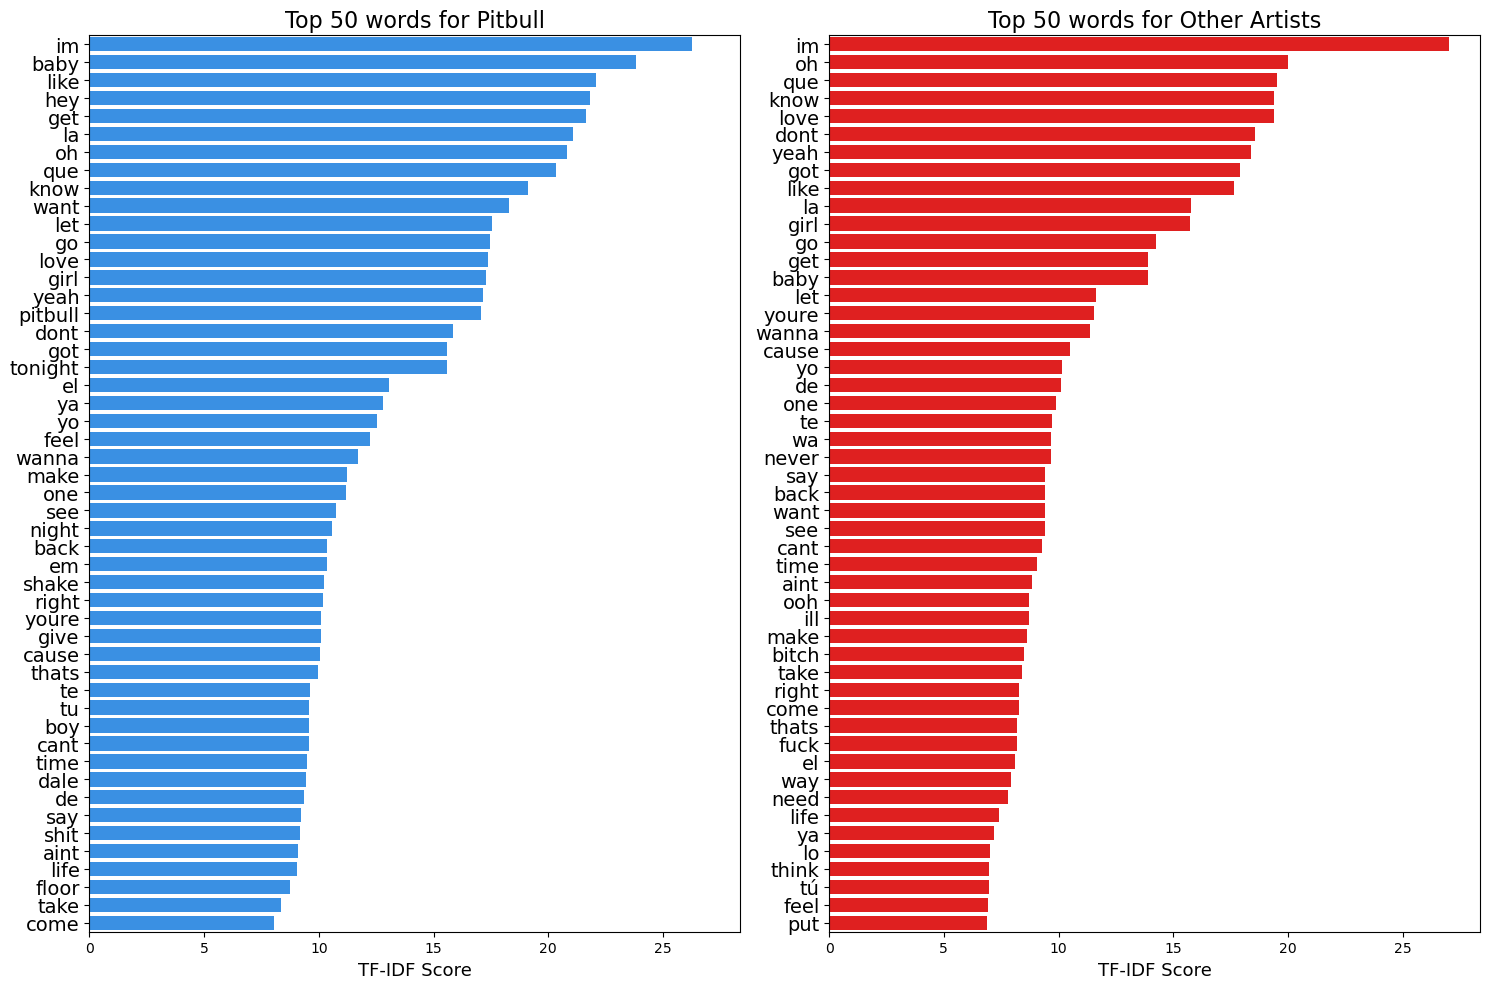

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'clean_cleaned_lyrics' column into a single string
cleaned_lyrics_text = [' '.join(lyrics) for lyrics in pitbull['clean_cleaned_lyrics']]

# Pitbull - fit/transform TF-IDF vectorizer to clean_cleaned_lyrics and get the 50 phrases with the highest TF-IDF scores
tfidf_pitbull = TfidfVectorizer()
vec_pitbull = tfidf_pitbull.fit_transform(cleaned_lyrics_text)
vec_pitbull = pd.DataFrame(vec_pitbull.toarray(), columns=tfidf_pitbull.get_feature_names_out())
pitbull_title_50 = vec_pitbull.sum().sort_values(ascending=False).head(50)

# Convert 'clean_cleaned_lyrics' column into a single string
cleaned_lyrics_text_other = [' '.join(lyrics) for lyrics in other['clean_cleaned_lyrics']]

# Other - fit/transform TF-IDF vectorizer to clean_cleaned_lyrics and get the 50 phrases with the highest TF-IDF scores
tfidf_other = TfidfVectorizer()
vec_other = tfidf_other.fit_transform(cleaned_lyrics_text_other)
vec_other = pd.DataFrame(vec_other.toarray(), columns=tfidf_other.get_feature_names_out())
other_title_50 = vec_other.sum().sort_values(ascending=False).head(50)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.barplot(y=pitbull_title_50.index.values, x=pitbull_title_50, color='dodgerblue', ax=ax[0])
ax[0].set_title('Top 50 words for Pitbull', fontsize=16)
ax[0].set_xlabel('TF-IDF Score', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=other_title_50.index.values, x=other_title_50, color='red', ax=ax[1])
ax[1].set_title('Top 50 words for Other Artists', fontsize=16)
ax[1].set_xlabel('TF-IDF Score', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()
plt.show()

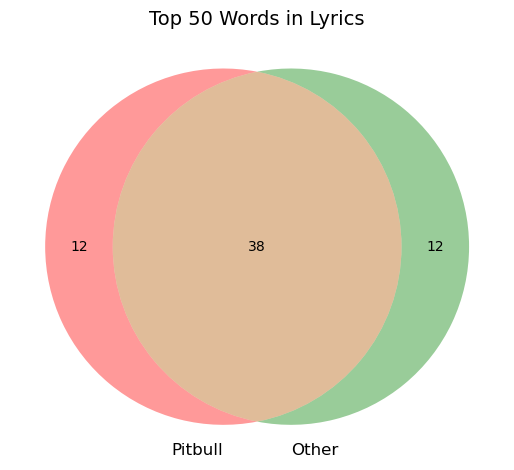

In [33]:
from matplotlib_venn import venn2

pitbull_set = set(pitbull_title_50.index)
other_set = set(other_title_50.index)
venn2([pitbull_set, other_set], set_labels=('Pitbull', 'Other'))
plt.title('Top 50 Words in Lyrics', fontsize=14)
plt.tight_layout()
plt.show()

#### CVEC 

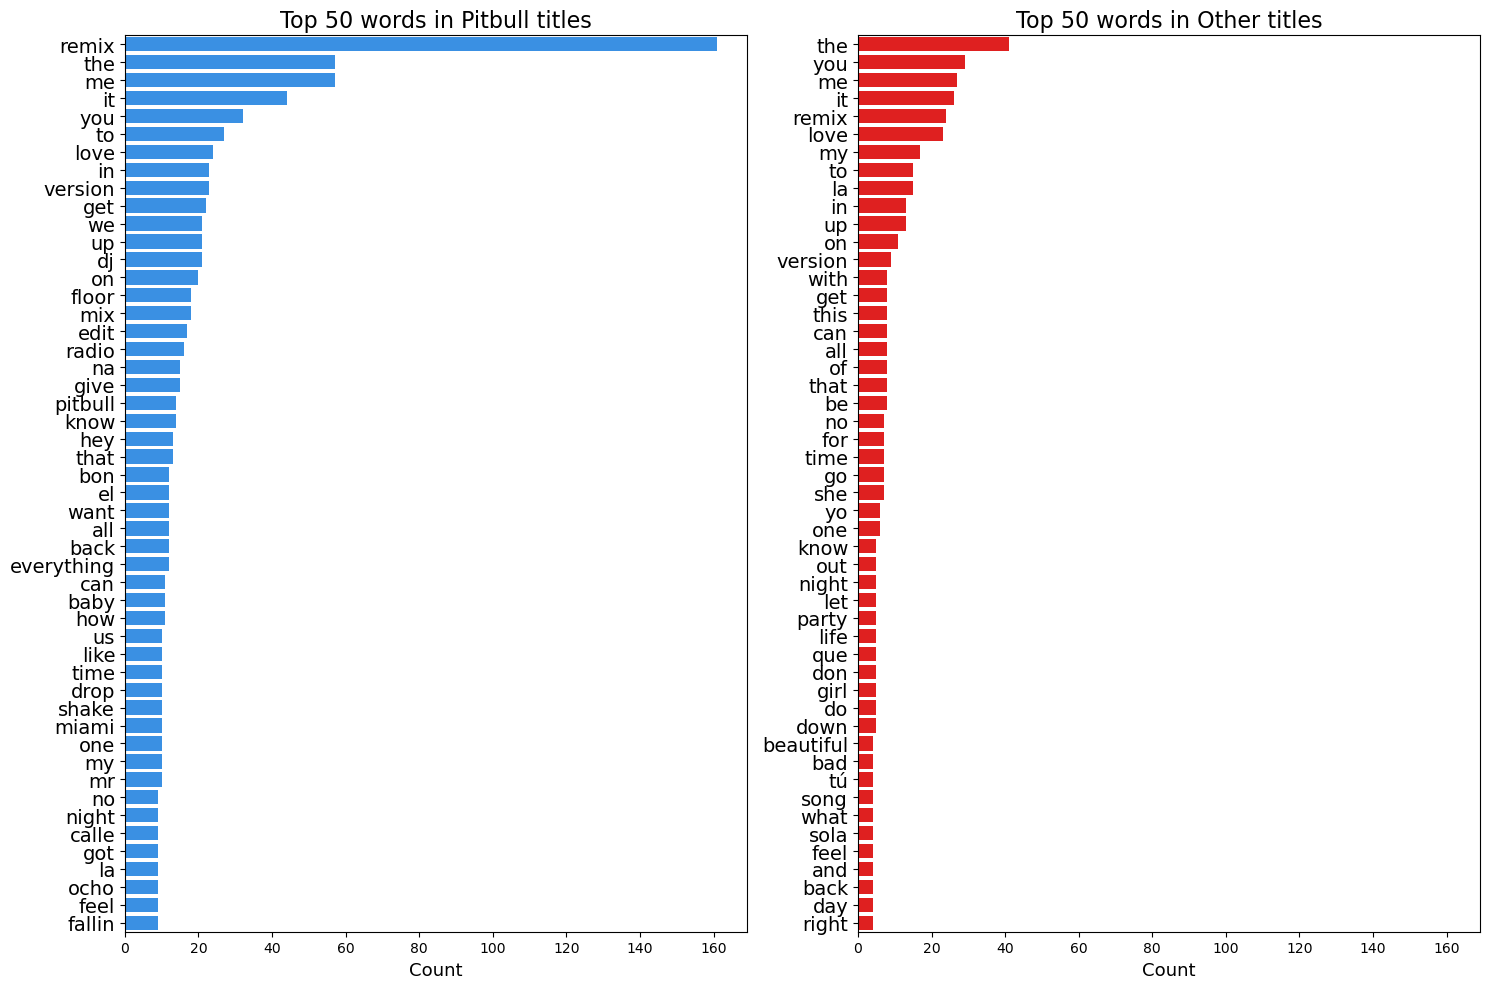

In [34]:
cvec = CountVectorizer()

# Pitbull - fit/transform count vectorizer to title and get the 50 phrases with the highest count
vec_pitbull = cvec.fit_transform(pitbull['title'])
vec_pitbull = pd.DataFrame(vec_pitbull.toarray(), columns=cvec.get_feature_names_out())
pitbull_title_50 = vec_pitbull.sum().sort_values(ascending=False).head(50)

# Other - fit/transform count vectorizer to title and get the 50 phrases with the highest count
vec_other = cvec.fit_transform(other['title'])
vec_other = pd.DataFrame(vec_other.toarray(), columns=cvec.get_feature_names_out())
other_title_50 = vec_other.sum().sort_values(ascending=False).head(50)

# Plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10), sharex=True)

sns.barplot(y=pitbull_title_50.index.values, x=pitbull_title_50, color='dodgerblue', ax=ax[0])
ax[0].set_title('Top 50 words in Pitbull titles', fontsize=16)
ax[0].set_xlabel('Count', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=other_title_50.index.values, x=other_title_50, color='red', ax=ax[1])
ax[1].set_title('Top 50 words in Other titles', fontsize=16)
ax[1].set_xlabel('Count', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()
plt.show()

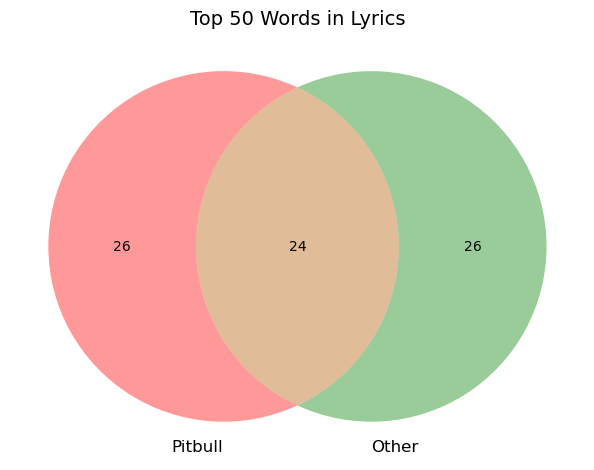

In [35]:
from matplotlib_venn import venn2

pitbull_set = set(pitbull_title_50.index)
other_set = set(other_title_50.index)
venn2([pitbull_set, other_set], set_labels=('Pitbull', 'Other'))
plt.title('Top 50 Words in Lyrics', fontsize=14)
plt.tight_layout()
plt.show()

## Save to CSV 

In [36]:
# Changing all artist values for Pitbull to 1 for modeling later 
pitbull['artist'] = 1

In [37]:
# Save the DataFrame to a CSV file
pitbull.to_csv('../Data/final_pitbull_clean.csv', index=False) 

In [38]:
pit = pd.read_csv('../Data/final_pitbull_clean.csv')
pit.head()

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics,cleaned_lyrics,clean_cleaned_lyrics
0,Pitbull (Ft. Vein (Producer)),11:59 by Pitbull (Ft. Vein (Producer)),654086,11:59,11:59 (Ft. Vein (Producer)),https://genius.com/Pitbull-11-59-lyrics,"[{'api_path': '/artists/7076', 'header_image_u...",1,11 Contributors11:59 Lyrics[Intro: Pitbull & V...,"\nWe shut down Times Square, extra extra read ...","['', 'pitbull', 'vein', 'vein', 'someone', 'po..."
1,Pitbull (Ft. Lil Jon),305 Anthem by Pitbull (Ft. Lil Jon),37215,305 Anthem,305 Anthem (Ft. Lil Jon),https://genius.com/Pitbull-305-anthem-lyrics,"[{'api_path': '/artists/107', 'header_image_ur...",1,17 Contributors305 Anthem Lyrics[Intro: Pitbul...,"\nMan I've been on the grind\n1 in the head, 1...","['', 'anthem', 'pitbull', 'lil', 'chico', 'pit..."
2,Pitbull (Ft. Jamie Drastik),305 In Paris by Pitbull (Ft. Jamie Drastik),9071119,305 In Paris,305 In Paris (Ft. Jamie Drastik),https://genius.com/Pitbull-305-in-paris-lyrics,"[{'api_path': '/artists/26923', 'header_image_...",1,1 Contributor305 In Paris Lyrics[Intro]\nWe're...,[Chorus: Pitbull]\nFlow so hard that chico get...,"['', 'paris', 'gonna', 'skate', 'one', 'song',..."
3,Pitbull,305 Til I Die by Pitbull,8988638,305 Til I Die,305 Til I Die,https://genius.com/Pitbull-305-til-i-die-lyrics,[],1,1 Contributor305 Til I Die Lyrics[Intro]\nIntr...,NaN,"['', 'til', 'die', 'mr', 'three', 'yeah', 'yea..."
4,Los Rafas (Ft. Pitbull),3bkzo RIMIX by Los Rafas (Ft. Pitbull),3972879,3bkzo RIMIX,3bkzo RIMIX (Ft. Pitbull),https://genius.com/Los-rafas-3bkzo-rimix-lyrics,"[{'api_path': '/artists/628', 'header_image_ur...",1,1 Contributor3bkzo RIMIX Lyrics[INTRO]\nMateín...,NaN,"['', 'rimix', 'mateín', 'checho', 'representan..."


In [39]:
# Changing all artist values for other to 0 for modeling later 
other['artist'] = 0 

In [40]:
# Save the DataFrame to a CSV file
other.to_csv('../Data/final_other_clean.csv', index=False)

In [41]:
oth = pd.read_csv('../Data/final_other_clean.csv')
oth.head()

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics,clean_cleaned_lyrics
0,Britney Spears,...Baby One More Time by Britney Spears,78169,...Baby One More Time,...Baby One More Time,https://genius.com/Britney-spears-baby-one-mor...,[],0,118 ContributorsTranslationsItalianoEnglish......,"['', 'one', 'time', 'oh', 'baby', 'baby', 'oh'..."
1,Britney Spears,Toxic by Britney Spears,110982,Toxic,Toxic,https://genius.com/Britney-spears-toxic-lyrics,[],0,109 ContributorsTranslationsСрпскиPortuguêsTox...,"['', '', 'baby', 'cant', 'see', 'im', 'calling..."
2,Britney Spears,Work Bitch by Britney Spears,218073,Work Bitch,Work Bitch,https://genius.com/Britney-spears-work-bitch-l...,[],0,70 ContributorsTranslationsPortuguêsWork Bitch...,"['', 'bitch', 'wanna', 'wanna', 'want', 'hot',..."
3,Britney Spears,Oops!... I Did It Again by Britney Spears,3988,Oops!... I Did It Again,Oops!... I Did It Again,https://genius.com/Britney-spears-oops-i-did-i...,[],0,73 ContributorsOops!... I Did It Again Lyrics[...,"['', 'mmm', 'yeah', 'yeah', 'yeah', 'yeah', 'y..."
4,Britney Spears,If U Seek Amy by Britney Spears,193709,If U Seek Amy,If U Seek Amy,https://genius.com/Britney-spears-if-u-seek-am...,[],0,66 ContributorsTranslationsEnglishIf U Seek Am...,"['', 'u', 'seek', 'amy', 'la', 'la', 'la', 'la..."


### Save All to Combined CSV 

In [42]:
pit.columns 

Index(['artist_names', 'full_title', 'id', 'title', 'title_with_featured',
       'url', 'featured_artists', 'artist', 'lyrics', 'cleaned_lyrics',
       'clean_cleaned_lyrics'],
      dtype='object')

In [46]:
combined = pd.merge(pit, oth, on=['artist_names', 'full_title', 'id', 'title', 'title_with_featured',
       'url', 'featured_artists', 'artist', 'lyrics',
       'clean_cleaned_lyrics'], how='outer').fillna(0) # Filling missing values for cleaned_lyrics since the other dataframe did not need this column 

In [47]:
combined.isnull().sum()

artist_names            0
full_title              0
id                      0
title                   0
title_with_featured     0
url                     0
featured_artists        0
artist                  0
lyrics                  0
cleaned_lyrics          0
clean_cleaned_lyrics    0
dtype: int64

In [48]:
# Save the DataFrame to a CSV file
combined.to_csv('../Data/combined.csv', index=False)

In [49]:
combined.head()

,artist_names,full_title,id,title,title_with_featured,url,featured_artists,artist,lyrics,cleaned_lyrics,clean_cleaned_lyrics
0,Pitbull (Ft. Vein (Producer)),11:59 by Pitbull (Ft. Vein (Producer)),654086,11:59,11:59 (Ft. Vein (Producer)),https://genius.com/Pitbull-11-59-lyrics,"[{'api_path': '/artists/7076', 'header_image_u...",1,11 Contributors11:59 Lyrics[Intro: Pitbull & V...,"\nWe shut down Times Square, extra extra read ...","['', 'pitbull', 'vein', 'vein', 'someone', 'po..."
1,Pitbull (Ft. Lil Jon),305 Anthem by Pitbull (Ft. Lil Jon),37215,305 Anthem,305 Anthem (Ft. Lil Jon),https://genius.com/Pitbull-305-anthem-lyrics,"[{'api_path': '/artists/107', 'header_image_ur...",1,17 Contributors305 Anthem Lyrics[Intro: Pitbul...,"\nMan I've been on the grind\n1 in the head, 1...","['', 'anthem', 'pitbull', 'lil', 'chico', 'pit..."
2,Pitbull (Ft. Jamie Drastik),305 In Paris by Pitbull (Ft. Jamie Drastik),9071119,305 In Paris,305 In Paris (Ft. Jamie Drastik),https://genius.com/Pitbull-305-in-paris-lyrics,"[{'api_path': '/artists/26923', 'header_image_...",1,1 Contributor305 In Paris Lyrics[Intro]\nWe're...,[Chorus: Pitbull]\nFlow so hard that chico get...,"['', 'paris', 'gonna', 'skate', 'one', 'song',..."
3,Pitbull,305 Til I Die by Pitbull,8988638,305 Til I Die,305 Til I Die,https://genius.com/Pitbull-305-til-i-die-lyrics,[],1,1 Contributor305 Til I Die Lyrics[Intro]\nIntr...,0,"['', 'til', 'die', 'mr', 'three', 'yeah', 'yea..."
4,Los Rafas (Ft. Pitbull),3bkzo RIMIX by Los Rafas (Ft. Pitbull),3972879,3bkzo RIMIX,3bkzo RIMIX (Ft. Pitbull),https://genius.com/Los-rafas-3bkzo-rimix-lyrics,"[{'api_path': '/artists/628', 'header_image_ur...",1,1 Contributor3bkzo RIMIX Lyrics[INTRO]\nMateín...,0,"['', 'rimix', 'mateín', 'checho', 'representan..."


In [50]:
combined.shape

(1258, 11)